# Boston Housing Price Prediction

Created by: Md. Manir Uddin 

Source of dataset: [UCI repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

## 1.1 Project objectives

- Predict housing prices in Boston using data provided
- Go through and familiarise with the end-to-end of process of machine learning, from data exploration, feature preprocessing and engineering, to model training and validation


## 1.2 Approach

Before diving into the analysis and implementation, I conducted some preliminary research to get an idea of how to approach a machine learning project. These 3 links were particularly helpful in helping me structure the project, which is listed as steps below.
- [Hacker Earth - Practical Machine Learning Project in Python](https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/)
- [Kaggle - Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- [Machine Learning Mastery - Your First Machine Learning Project in Python](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)


Steps:
1. Resist the temptation to dive straight into data - start by thinking through the problem
    - This is the most important step but also often the most overlooked one, especially for beginners who are eager to jump straight to training models and making predictions. If we don't scrutinise whether the data we are provided with make sense or not and if those variables should be included in the models, we run into the danger of blindly creating models that don't make sense.
    - Before even looking at the data provided, think about the nature of problem, consider whether it's something that can be tackled with data and modelling. If it can be tackled by data, think about what kind of data would be useful and relevant, think about what factors could be used for prediction
    - If the subject domain is not something you are familiar with, conduct some quick research to get a sense of what factors could be relevant
    - Going through these steps will help develop an intuition of the problem at hand, and provide the framework & context for analysing and modelling the data
2. Data exploration and analysis
    - After developing the intuition and framework, the next step is to look at what variables are provided in the data, and think about how we can incorporate the data into our framework in order to solve the overarching problem. For this step, resist looking at the actual data points, just go through the variables that are provided, for example no. of rooms, crime rate of neighbourhood etc, and think about logically what we would expect their effect to be. This acts as a preliminary feature selection phase to help us filter out variables that are irrelevant right at the start.
    - Finally, after going through the variables provided, dive into the actual data points and conduct univariate & multivariate analysis to understand their distributions and relationships
    - Make sure to constantly ask questions - go through each variable, evaluate them using the framework we have created in previous steps, consider if the data we have are fit for use and if they are displaying the relationships that we would expect.
3. Features selection, preprocessing and engineering
    - This is the final step before jumping into modelling. Using the data insights gathered from previous steps, shortlist the features that are important for modelling, preprocess them as well as engineer new features if necessary.
4. Model training, tuning & validation
    - Finally, identify models that may be applicable and train them using training data
    - Tune the models as required
    - Validate to make sure the models are not under- or overfitting and can be extended to test data

# 2. Set up

## 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import math

%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2.2 Read in data

Data columns as defined in the description file from UCI repository:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000  
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_raw = pd.read_csv('housing.csv', header=None)
df_raw.columns = columns

print('No. of rows and columns:', df_raw.shape)
display(df_raw.head())

No. of rows and columns: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


# 3. Exploratory data analysis

## 3.1 Target variable analysis - Median Home Value
### 3.1.1 First Pass

First pass at checking target variable's distribution

Skewness: 1.108098
Kurtosis: 1.495197


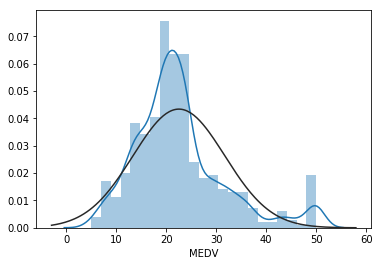

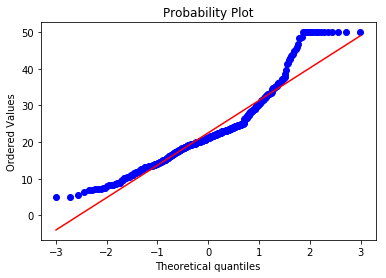

In [3]:
print("First pass at checking target variable's distribution\n")

target = df_raw['MEDV']

# check distribution
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

After first pass, it appears that the median sales prices have a skewed normal distribution, and is more peaked than normal.
There also appears to be high number of outliers at around MEDV of 50, which I will investigate next.

I start by looking at the raw data, to get a rough sense of what these outliers are.

In [4]:
df_raw.sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.015010,90.0,1.21,1,0.4010,7.923,24.799999,5.8850,1,198,13.600000,395.519989,3.160000,50.000000
225,0.526930,0.0,6.20,0,0.5040,8.725,83.000000,2.8944,8,307,17.400000,382.000000,4.630000,50.000000
369,5.669980,0.0,18.10,1,0.6310,6.683,96.800003,1.3567,24,666,20.200001,375.329987,3.730000,50.000000
370,6.538760,0.0,18.10,1,0.6310,7.016,97.500000,1.2024,24,666,20.200001,392.049988,2.960000,50.000000
371,9.232300,0.0,18.10,0,0.6310,6.216,100.000000,1.1691,24,666,20.200001,366.149994,9.530000,50.000000
372,8.267250,0.0,18.10,1,0.6680,5.875,89.599998,1.1296,24,666,20.200001,347.880005,8.880000,50.000000
186,0.056020,0.0,2.46,0,0.4880,7.831,53.599998,3.1992,3,193,17.799999,392.630005,4.450000,50.000000
204,0.020090,95.0,2.68,0,0.4161,8.034,31.900000,5.1180,4,224,14.700000,390.549988,2.880000,50.000000
257,0.611540,20.0,3.97,0,0.6470,8.704,86.900002,1.8010,5,264,13.000000,389.700012,5.120000,50.000000
195,0.013810,80.0,0.46,0,0.4220,7.875,32.000000,5.6484,4,255,14.400000,394.230011,2.970000,50.000000


There are 16 values with MEDV of exactly 50.0. It could be a coincidence to have the same exact value or it could be that data was not inputted correctly or that value of 50.0 was used when MEDV is unknown.

To verify this, I then run a bivariate analysis of data without the 50s, and data with just the 50s.

Bivariate plots of data where MEDV != 50


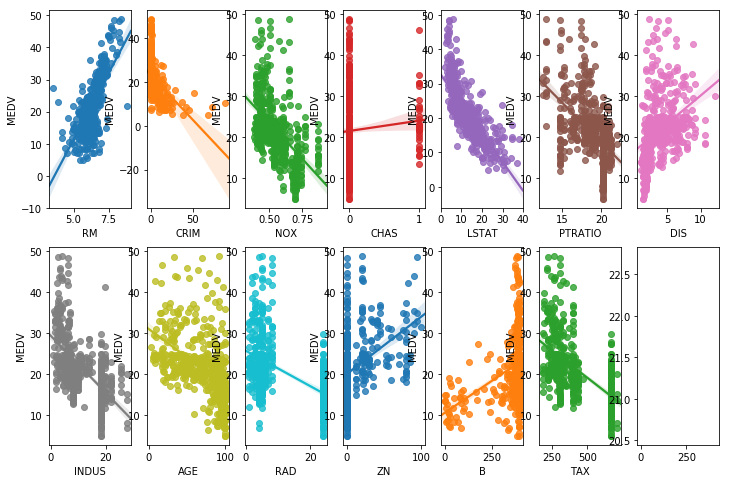

In [5]:
print("Bivariate plots of data where MEDV != 50")
feature_cols = set(df_raw.columns) - set(['MEDV'])
df = df_raw[df_raw['MEDV'] != 50]
fig, axs = plt.subplots(ncols=7,nrows=2,figsize=(12, 8))

for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[int(i/7), i%7])

Bivariate plots of data where MEDV == 50


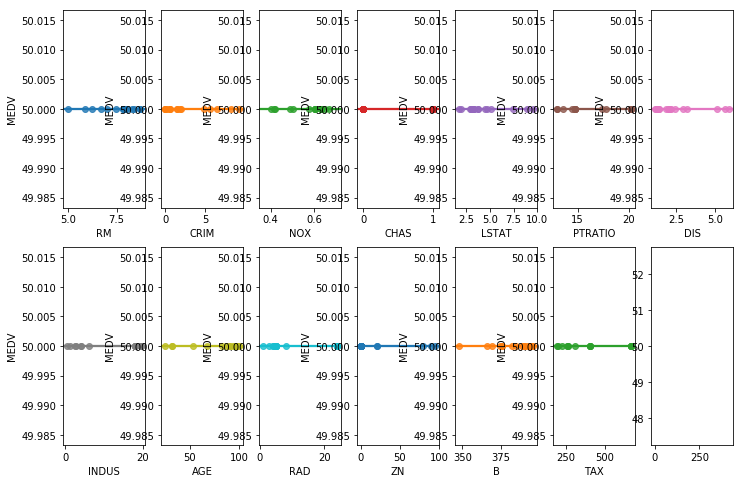

In [6]:
print("Bivariate plots of data where MEDV == 50")
df = df_raw[df_raw['MEDV'] == 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 8))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[int(i/7), i%7])

For data points where MEDV = 50, it appears that the values of their features are randomly distributed. None of their bivariate relationships bears resemblance to the relationships seen in the data where MEDV != 50.

This suggests that MEDV = 50 could have been an input error or just a placeholder value. Hence I will exclude them and have a second pass at target variable analysis.

### 3.2 Second pass - Remove outlier values

490
Skewness: 0.775660
Kurtosis: 1.049637


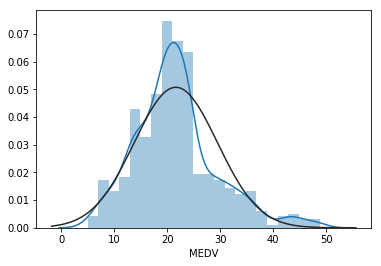

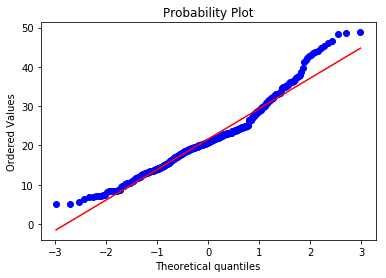

In [7]:
# check how many data points do I have
df_f = df_raw[df_raw['MEDV'] != 50] 
print(len(df_f))

target = df_f['MEDV']

# look at how these data is distributed - histogram
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

After removal of the data points with MEDV = 50, the target variable is 'smoother', though it suffers from heavy tails.

### 3.3 Third Pass - log-transform MEDV

Skewness: -0.585281
Kurtosis: 0.994297


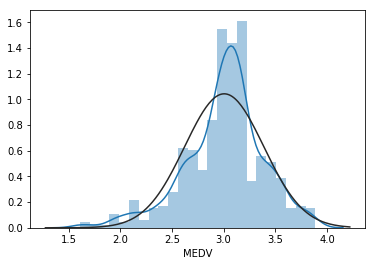

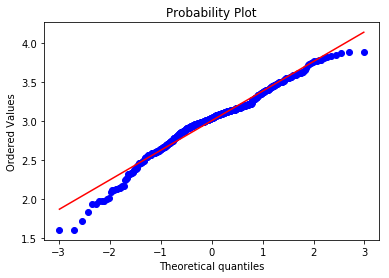

In [8]:
# transform data 
target_log = np.log(target)

# look at how these data is distributed - histogram
sns.distplot(target_log, fit=norm)
fig = plt.figure()
res = stats.probplot(target_log, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target_log.skew())
print("Kurtosis: %f" % target_log.kurt())

Log-transformation did not improve the absolute skewness by much, so I will proceed to use the raw data without transformation.

## 3.2 Features analysis

Now that we have looked at our target variable, it's time to look at the features available. First let's think about what relationships we would expect between the features and the target variable.

### 3.2.1 Logical analysis of the expected relationships between features and housing price

Expected relationships between features and housing price:
- CRIM - per capita crime rate by town  
    - As crime rate increases, a neighbourhood becomes less inhabitable, which will drive down housing demand and pricing. Hence, I expect an inverse linear or inverse sigmoid relationship between crime rate and housing price.
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - TODO: clarify what this is, couldn't figure it out.  
- INDUS - proportion of non-retail business acres per town
    - Non-retail businesses would mean factories or warehouses, which are typically located further out from central, with cheaper land. So I would think that this have an inverse relationship with housing price.
- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - I would think it's good to be close to the river, to be able to walk or jog along it. Hence a positive relationship, but I think this is a subjective one.
- NOX - nitric oxides concentration (parts per 10 million)
    - Nitric oxide is a pollutant, hence I would expect a neighbourhood with high level of nitric oxide to have lower housing demand and housing.
- RM - average number of rooms per dwelling
    - In general, more rooms mean the house is bigger. Hence, I expect a positive relationship with housing price.
- AGE - proportion of owner-occupied units built prior to 1940
    - In general, the newer a house the better, hence I expect a positive relationship. However, there may be old antique houses that would fetch high prices.
- DIS - weighted distances to five Boston employment centres
    - Not exactly sure how relevant the distance to employment centres is, because if people are employed, they probably don't care if the centres are far away. Going along that line of reasoning, if could be that only people who are unemployed value them more. Hence I would guess this variable is either irrelevant or have inverse relationship with housing price.
- RAD - index of accessibility to radial highways
    - People value accessibility, as it is convenient and saves time, so this should have a positivel relationship with price.
- TAX - full-value property-tax rate per $10,000
    - More expensive properties should have higher tax rate, so this should be positive relationship.
- PTRATIO - pupil-teacher ratio by town
    - Lower PT ratio means each pupil gets more teacher attention. Hence, I expect lower PT ratio to correspond to education quality, which in turn has positive relationship with housing price.
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - According to [research](http://money.cnn.com/2016/06/27/news/economy/racial-wealth-gap-blacks-whites/index.html), the Black ethnic group has a lower median income compared to other groups. As income is positively correlated with the house that one can afford, I expect this variable to have an inverse relationship with housing price.
- LSTAT - % lower status of the population
    - In general, status is positively correlated to income, which is positively correlated with housing price. Hence the higher the proportion of lower status, the lower the housing price.

Thoughts from logical analysis: 

The features available cover a wide range of factors that we expect to affect housing price, including security, accessibility, qualty of education, demographics, air quality etc. We don't have key information specific to the houses, such as its size, no. of rooms etc, but given the wide range of external factors available, we may be able to derive some predictive value out of them.

### 3.2.2 Features overview - check data types and missing values

In [9]:
df_raw.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


All features are numerical, and there is no missing value.

### 3.2.3 Univariate analysis

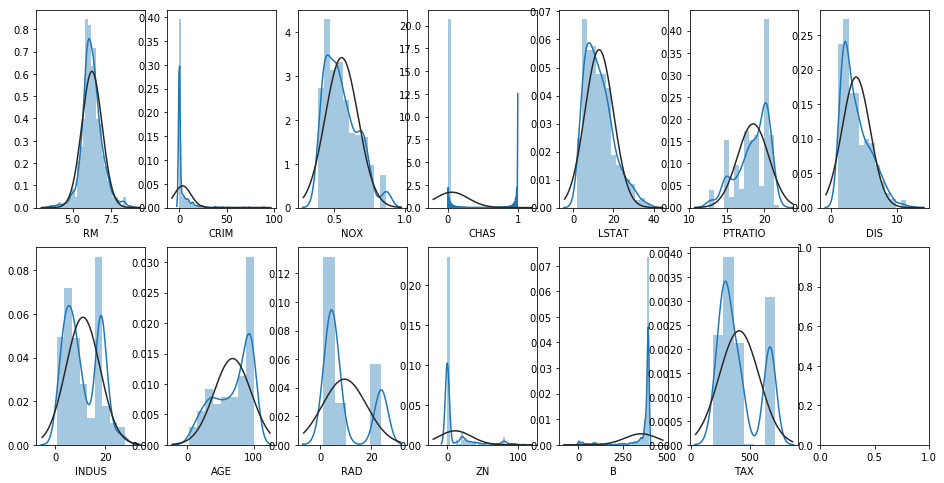

In [10]:
df = df_raw[
    df_raw['MEDV'] != 50
]
feature_cols = set(df_raw.columns) - set(['MEDV'])
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 8))
for i, f in enumerate(feature_cols):
    sns.distplot(df[f], fit=norm, ax=axs[int(i/7), i%7])

While all features are numerical, some are actually categorical, such as CHAS. Most features are not normally distributed.

### 3.2.4 Bivariate analysis

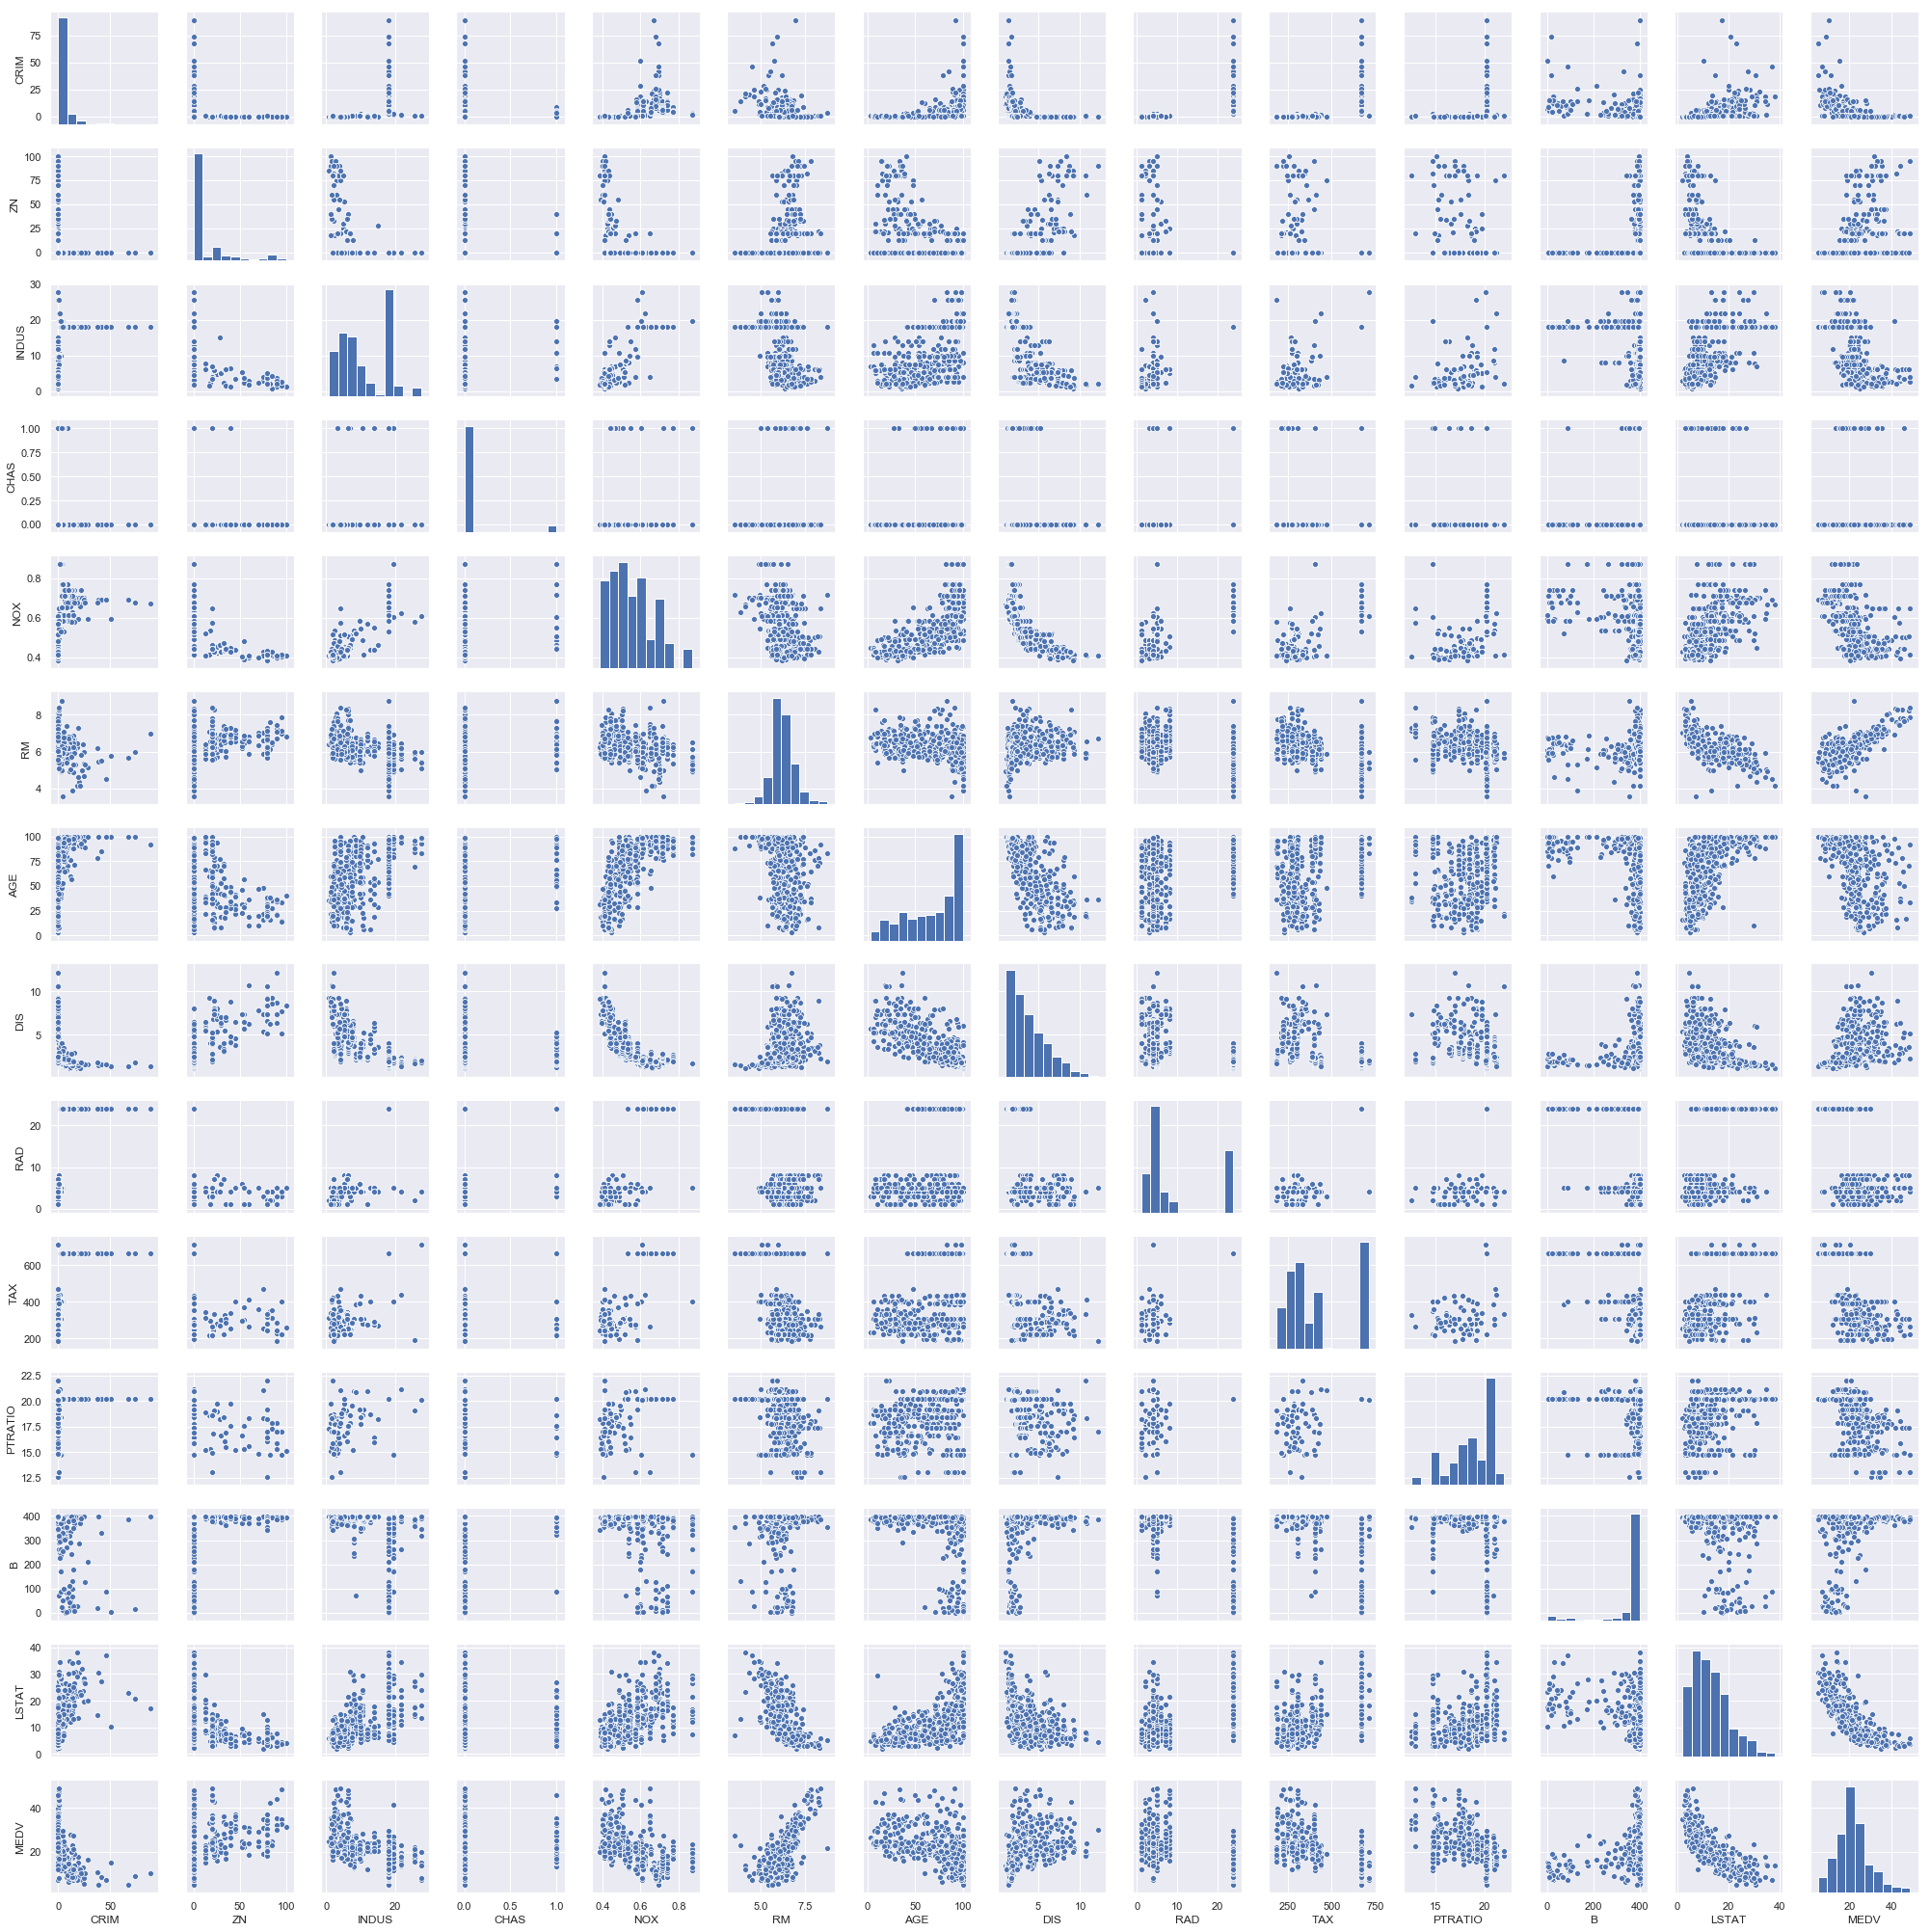

In [11]:
df = df_raw[
    df_raw['MEDV'] != 50
]
sns.set()
sns.pairplot(df, size =2)
plt.show();

Looking at the last row, it appears that some variables have no useful relationship against MEDV. Let's verify that by looking at correlation matrix.

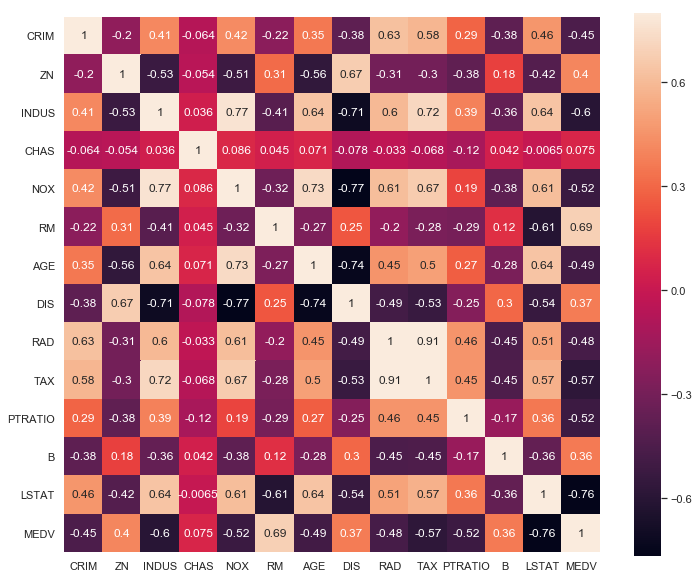

In [12]:
#correlation matrix
df = df_raw[df_raw['MEDV'] != 50]
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Looking at the last row, it's apparent that CHAS has little correlation with MEDV, while CRIM, ZN, AGE, DIS, RAD, B have less than abs(0.5) correlation. This implies that CHAS won't provide much predictive value, and should be excluded from the modelling. We could potentially exclude the other poorly correlated ones too.

Next I will move on to feature pre-processing.

# 4. Data pre-processing

There are no categorical variables, hence I will only need to handle pre-processing of numerical variables.

I first split the data into training and test sets, then apply scaling to transform all feature values to fall between 0 and 1. Scaling features is important to allow model training methods such as gradient descent to converge more quickly.

## 4.1 Split data into train and test sets

In [13]:
# exclude data points with MEDV = 50, as we found it likely to be erroneous value
df = df_raw[
    df_raw['MEDV'] != 50
]

# exclude MEDV which is the target variable, and CHAS which has low correlation with MEDV
feature_cols = list(set(df.columns) - set(['MEDV', 'CHAS']))

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols], df['MEDV'], test_size=0.25, random_state=25
)

print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 367
No. of test data: 123


## 4.2 Standardise scaling of all features

In [14]:
# normalise and scale all features so that all feature values fall between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)

for i, col in enumerate(feature_cols):
    X_train[col] = scaled[:,i]


scaled_test = scaler.transform(X_test)

print('Before scaling:')
display(X_test.head())

for i, col in enumerate(feature_cols):
    X_test[col] = scaled_test[:,i]

print('\nAfter scaling:')
display(X_test.head())

Before scaling:


,RM,CRIM,NOX,LSTAT,PTRATIO,DIS,INDUS,AGE,RAD,ZN,B,TAX
474,5.427,8.05579,0.584,18.139999,20.200001,2.4298,18.10,95.400002,24,0.0,352.579987,666
115,5.928,0.17134,0.547,15.760000,17.799999,2.4631,10.01,88.199997,6,0.0,344.910004,432
473,6.980,4.64689,0.614,11.660000,20.200001,2.5329,18.10,67.599998,24,0.0,374.679993,666
251,6.438,0.21409,0.431,3.590000,19.100000,7.3967,5.86,8.900000,7,22.0,377.070007,330
359,6.112,4.26131,0.770,12.670000,20.200001,2.5091,18.10,81.300003,24,0.0,390.739990,666



After scaling:


,RM,CRIM,NOX,LSTAT,PTRATIO,DIS,INDUS,AGE,RAD,ZN,B,TAX
474,0.385776,0.090474,0.409465,0.461714,0.808511,0.114643,0.642963,0.952626,1.000000,0.00,0.888244,0.914122
115,0.489353,0.001855,0.333333,0.393714,0.553191,0.117683,0.343333,0.878476,0.217391,0.00,0.868904,0.467557
473,0.706843,0.052159,0.471193,0.276571,0.808511,0.124056,0.642963,0.666323,1.000000,0.00,0.943971,0.914122
251,0.594790,0.002335,0.094650,0.046000,0.691489,0.568145,0.189630,0.061792,0.260870,0.22,0.949998,0.272901
359,0.527393,0.047825,0.792181,0.305429,0.808511,0.121883,0.642963,0.807415,1.000000,0.00,0.984467,0.914122


# 5. Train and evaluate models

For this project, the focus is more on going through the end-to-end process of a machine learning project, instead of optimising for accuracy of prediction. Hence, I will compare different machine learning models in the following section, but won't delve into model tuning.

## 5.1 Set up different types of regressors

In [15]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# a benchmark regressor that simply takes mean of training sample as predicted value
class BenchmarkRegressor:
    def __init__(self):
        pass
    
    def fit(self, X, y, **kwargs):
        self.mean = y.mean()
        
    def predict(self, X):
        return [self.mean] * len(X)
    
    def get_params(self, deep=False):
        return {}

bm_regr = BenchmarkRegressor()
lr_regr = LinearRegression()
xg_regr = xgb.XGBRegressor()
ls_regr = Lasso()
dt_regr = DecisionTreeRegressor()
rf_regr = RandomForestRegressor()

# create a list of models and evaluate each model 
models = [
    ('Benchmark', bm_regr),
    ('LR', lr_regr),
    ('XGBoost', xg_regr),
    ('Lasso', ls_regr),
    ('Decision Tree', dt_regr),
    ('Random Forest', rf_regr)
]

## 5.2 Cross-validation using RMSE metric

I tried training different models with all features (excluding CHAS) and also with a subset of features that have more than 0.5 correlation. However, training on the subset of features did not improve scoring metrics, so in this final version, I only kept models that are trained on all features excluding CHAS.

In [16]:
print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=6)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
    print("{}: {} ({})".format(name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results)))
    print('Result from each iteration of cross validation:', cv_results, '\n')  

Root Mean Square Error (RMSE) score

Benchmark: 8.209364140961119 (1.322186914750391)
Result from each iteration of cross validation: [ -65.48539133  -53.31851441  -89.27216394  -70.47379733  -59.429407
  -45.6883114  -125.12850929  -75.85373027  -39.80639441  -66.962159  ] 

LR: 3.902145901451565 (0.8134014026968002)
Result from each iteration of cross validation: [-14.93920238 -24.47607311 -12.37800773 -23.17981149 -15.78636731
  -8.82742664 -26.5426483   -7.1414764  -15.79485943  -9.81777201] 

[23:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:18] WARNING: src/objective

XGBoost and Random Forest have the lowest RMSE scores.

## 5.3 Cross validation using R2 value

In [17]:
print("R-squared Value\n")
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=6)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))
    print('Result from each iteration of cross validation:', cv_results, '\n')   

R-squared Value

Benchmark: -0.06907009217522322 (0.0682624636139595)
Result from each iteration of cross validation: [-4.52546352e-02 -5.67987304e-02 -3.43058493e-03 -1.49704754e-02
 -7.05019512e-02 -1.16966748e-02 -2.15093588e-01 -1.45931014e-01
 -3.50680815e-05 -1.26988200e-01] 

LR: 0.7395942578212827 (0.11260714030566099)
Result from each iteration of cross validation: [0.76154574 0.5148724  0.8608696  0.6661621  0.71564015 0.80453035
 0.74225057 0.8921129  0.60319407 0.83476469] 

[23:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:33] WARNING: src/objective/regression

Again, XGBoost and Random Forest both produce the highest R2 scores, with XGBoost edging ahead by a little.

# 6. Make predictions on test data

After conducting k-fold cross validation, XGBoost is identified as the best model. It is then used for the final training and testing.

[23:24:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE score: 3.4946338281743543
R2 score: 0.7114048342146762

Scatter plot of y_test against y_pred:


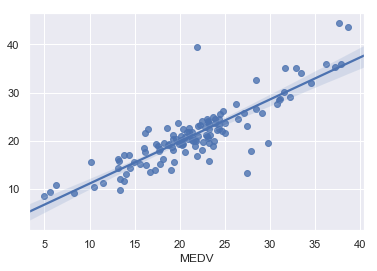

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# train model using X_train and y_train, and make predictions on X_test
model = xg_regr
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print('\nScatter plot of y_test against y_pred:')
sns.regplot(y_test, y_pred);

From the scatter plot, we see that the final model does a good job at predicting housing price as most of the predicted values do not deviate too much from the actual values. We also have a decent R2 score of 0.71.

# 7. Concluding notes

Going through this machine learning project from end to end was incredibly useful in the following ways:
- Understanding the rationale of each step (from preliminary analysis to modelling), and focusing on working towards the rationales, instead of following a rigid set of operations. This is importance because each machine learning is unique and we will have to adapt our treatments of data and modelling accordingly based on data quirks and needs. 
- Learning how to implement each step in code by leveraging on existing packages, so as to minimise the time spent on coding and maximise the time spent on understanding the data and modelling it
- Thinking through the nuances of each step - For e.g., Should I apply standardisation or normalisation to features when doing pre-processing? What should I look for when sense-checking the different variables? Should I do univariate or bivariate analysis first, and does it matter?


Also, there are many improvements that can be made, some of which include:
- Better pre-processing of features - After conducting univariate analysis and realising that many features are not normally distributed, I just stopped there, because I didn't know how they should be handled. I will need to improve my knowledge in both modelling and transformation.
- Model tuning - For this project, I simply selected a list of regressors and trained them without specifying any model parameters. Instead, I could have finetuned them by using GridSearch for instance.

In [19]:
from datetime import datetime
print("Last run on", str(datetime.now()))

Last run on 2019-09-30 23:24:46.596405
